# Welcome to the AIMS Jupyter Notebook - MHC Germline Analysis Version!
Use this notebook to recreate the analysis of Boughter & Meier-Schellersheim 2022. Note, if any of the plots you are trying to recreate utilize the TCR3D database (Figure1, Figure4), then you will need to use the PRESTO repository, https://github.com/ctboughter/PRESTO
# As a refresher, hit ctrl + enter to run each cell
I tried to add comments and other markdown cells like this one where appropriate to help with interpretations. This first cell is just loading in all of the necessary python modules (which you should have already installed)

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as pl
from matplotlib import rcParams
from matplotlib import rc
import pandas

# THIS LAST BIT IS TO NAVIAGATE TO WHERE MY CUSTOM MODULES ARE LOCATED
import os
if os.getcwd()[-4:] != 'AIMS':
    default_path = os.getcwd()[:-10]
    os.chdir(default_path)
import aims_loader as aimsLoad
import aims_analysis as aims
import aims_classification as classy
from Bio import SeqIO
import seaborn as sns

# Run this cell to get better looking plots

In [2]:
# You can edit these at some point if you want to change the formatting of your figures
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 20}
COLOR = 'black'
rcParams['text.color'] = 'black'
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

rc('font', **font)

# Custom colormap code from: https://stackoverflow.com/questions/49367144/modify-matplotlib-colormap
import matplotlib as mpl
upper = mpl.cm.jet(np.arange(256))
lower = np.ones((int(256/4),4))
for i in range(3):
    lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

cmap = np.vstack(( lower, upper ))
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

# This is a Notebook Aimed at Reproducing the Analysis in Boughter & Meier-Schellersheim 2022
Soon to be released as a preprint (link to follow) and then headed for peer review! Take a peek there to follow along and match analysis to interpretation

# Start off with typical AIMS definition of parameters and filenames

# Load in MHC Files

In [3]:
receptor1_label = ['HLA-A','HLA-B','HLA-C']
seqFrameF = aimsLoad.get_HLA()
seq1 = seqFrameF[seqFrameF[0].str.contains('A')]; seq1_cols, seq1_0 = aims.labelIT(len(seq1),receptor1_label[0])
seq2 = seqFrameF[seqFrameF[0].str.contains('B')]; seq2_cols, seq2_0 = aims.labelIT(len(seq2),receptor1_label[1])
seq3 = seqFrameF[seqFrameF[0].str.contains('C')]; seq3_cols, seq3_0 = aims.labelIT(len(seq3),receptor1_label[2])

classI = pandas.concat([seq1,seq2,seq3])

# Loading in ClassII is a tiny bit cleaner (because I did it second)
# It is a bit slow, however, since there is so many alignment steps
classIIa_df,classIIb_df = aimsLoad.get_classII()

# Generate AIMS encoding and visualize matrix for class I

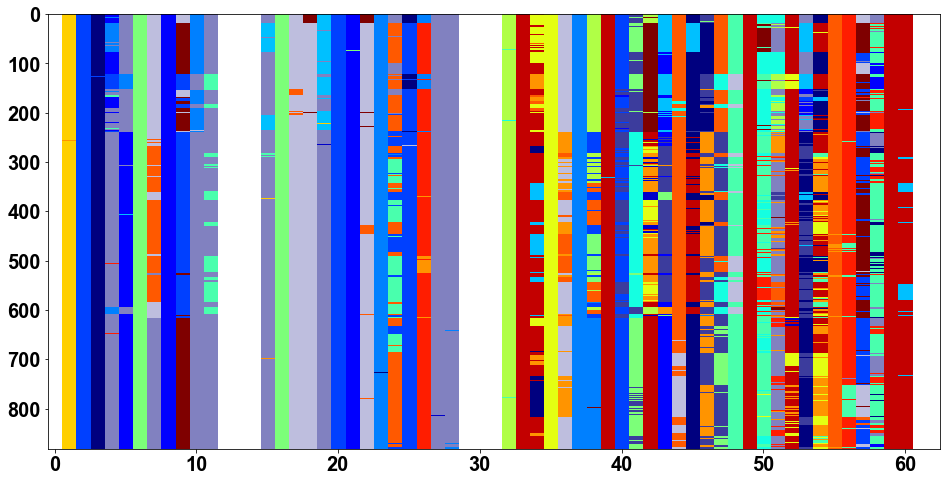

In [4]:
# Get these aligned sequences into an MSA matrix!!!
AA_num_key = aims.get_props()[1]
AA_num_key_dash = np.hstack((AA_num_key,[0]))
align = 'center'

# Gotta process these sequences:
plot_seq_classI = aims.get_mhcSub('classI',classI[1].values)

#plot_seq = np.transpose(np.array(seq_choice).reshape(len(seq_choice),1))
mat_sizeI = aims.get_sequence_dimension(np.transpose(plot_seq_classI))[0]
seq_MIclassI = aims.gen_MSA_matrix(np.transpose(plot_seq_classI) ,key = AA_num_key_dash, giveSize = mat_sizeI)

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
xyz = pl.imshow(seq_MIclassI, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig(mhc+'_multSpecies_SubMat.pdf',format='pdf')

# Generate AIMS encoding and visualize matrix for class II
Note, we DONT pick out the peptide contacting region for class II, as this wasn't a region of interest after the initial comparison for class I

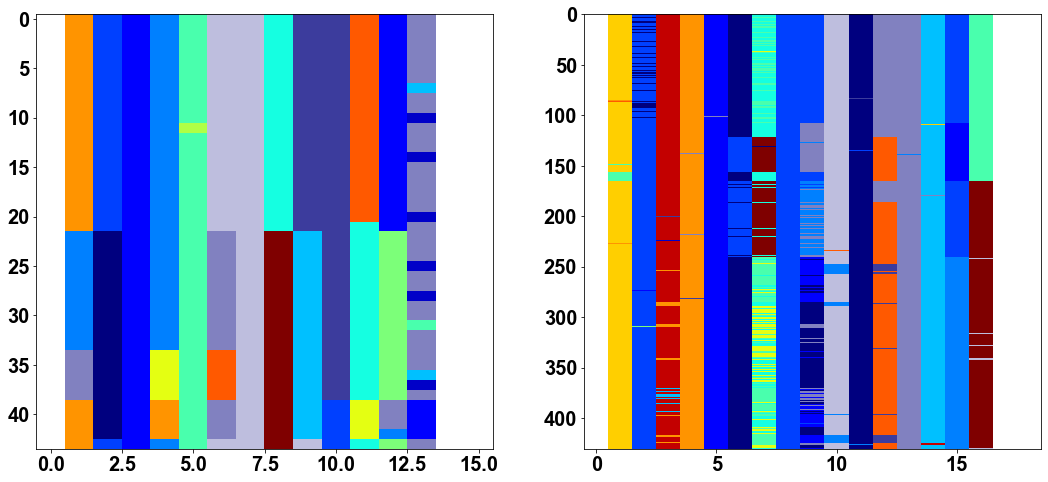

In [5]:
plot_seq_classIIa = aims.get_mhcSub('classIIa',classIIa_df[0].values)
plot_seq_classIIb = aims.get_mhcSub('classIIb',classIIb_df[0].values)

mat_sizeIIa = aims.get_sequence_dimension(np.transpose(plot_seq_classIIa))[0]
seq_MIclassIIa = aims.gen_MSA_matrix(np.transpose(plot_seq_classIIa) ,key = AA_num_key_dash, giveSize = mat_sizeIIa)
mat_sizeIIb = aims.get_sequence_dimension(np.transpose(plot_seq_classIIb))[0]
seq_MIclassIIb = aims.gen_MSA_matrix(np.transpose(plot_seq_classIIb) ,key = AA_num_key_dash, giveSize = mat_sizeIIb)

fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(18,8))
xyz = ax[0,0].imshow(seq_MIclassIIa, interpolation='nearest', aspect='auto',cmap=cmap)
xyz = ax[0,1].imshow(seq_MIclassIIb, interpolation='nearest', aspect='auto',cmap=cmap)

# Next, Load in TCRs and Plot the Matrix Representation

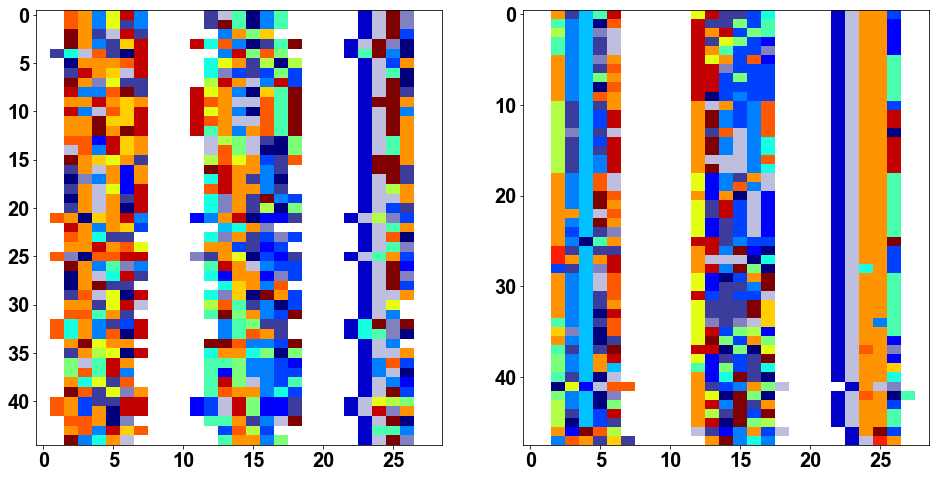

In [6]:
# Again, sequences are from IMGT Protein Displays, Just with CDR Loops Selected Out
# For now, only human analysis. Multi-organism is later on in this notebook
fin_trav = aimsLoad.Ig_loader('germline_data/trav_human_cdrs.csv','tcr',loops=3)
fin_trbv = aimsLoad.Ig_loader('germline_data/trbv_human_cdrs.csv','tcr',loops=3)

# Plot just the TCRs
mat_size_tcr = aims.get_sequence_dimension(np.array(fin_trav))[0]
seq_MI_trav = aims.gen_MSA_matrix(np.array(fin_trav) ,key = AA_num_key_dash, giveSize = mat_size_tcr)
seq_MI_trbv = aims.gen_MSA_matrix(np.array(fin_trbv) ,key = AA_num_key_dash, giveSize = mat_size_tcr)

fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(16,8))
xyz = ax[0,0].imshow(seq_MI_trav, interpolation='nearest', aspect='auto',cmap=cmap)
xyz = ax[0,1].imshow(seq_MI_trbv, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig('tcr_mat.pdf',format='pdf')

# Next, Reframe TCR-MHC Sequences as an Input-Output Problem
This makes the sequences compatible for the calculation of information-theoretic quantities

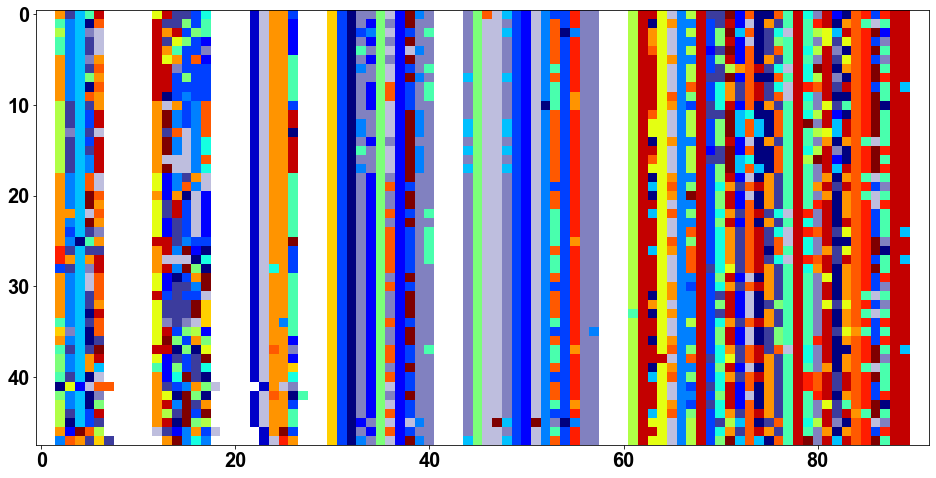

In [7]:
# pre-process the matrices
trav_mat_df = pandas.DataFrame(seq_MI_trav,index=fin_trav.columns)
trbv_mat_df = pandas.DataFrame(seq_MI_trbv,index=fin_trbv.columns)
MIclassI_mat_df = pandas.DataFrame(seq_MIclassI,index = classI[0])
MIclassIIa_mat_df = pandas.DataFrame(seq_MIclassIIa,index = classIIa_df['Allele'])
MIclassIIb_mat_df = pandas.DataFrame(seq_MIclassIIb,index = classIIb_df['Allele'])

# Visualize the resamples data to confirm we are properly pairing TCR CDR loops with
# single MHC sequences (specifically the key structural features)
matF = aims.randomize_tcr_mhc_pair(trbv_mat_df,MIclassI_mat_df)
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
xyz = ax[0,0].imshow(matF, interpolation='nearest', aspect='auto',cmap=cmap)

# Here is where we give the user some options for how to run these calculations
Basically, you can choose to do the very slow (but rigorous) bootstrapping of these calculations to exactly recreate the manuscript analysis or you can calculate the entropy for the non-resampled dataset and an example resampling to calculate mutual information

In [8]:
########## Again, we have a key definition here ###############
bootstrap = False
##############################################################

if bootstrap:
    import multiprocessing as mp
    # Define the number of replications (resamples) we want to run
    num_reps = 1000
    
    def boot_it(data):
        ######### Need to swap this out for every possible pair #######
        matF = aims.randomize_tcr_mhc_pair(trav_mat_df,MIclassI_mat_df)
        ##############################################################
        entropy,AA_count=aims.calculate_shannon(matF)
        MI,entropy_cond,counted=aims.calculate_MI(matF)
        return(entropy,MI,matF)
    # Command for mapping the bootstrap
    def do_boot(data):
        with mp.Pool() as pool:
            results = pool.map(boot_it, data)
            return(results)
    # Actually run the bootstrapping
    if __name__ == "__main__":
        resample_output = do_boot(np.arange(num_reps))

    # Concatenate everything
    for i in np.arange(num_reps):
        if i == 0:
            final_ent = resample_output[i][0]
            final_MI = resample_output[i][1]
        else:
            final_ent = np.vstack((final_ent,resample_output[i][0]))
            final_MI = np.dstack((final_MI,resample_output[i][1]))
    # Save the results so you don't need to run this super long calculation
    #np.save('classI_trav_bootEnt',final_ent)
    #np.save('classI_trav_bootMI',final_MI)
    
else:
    # Calculate the entropy for each individual dataset
    entropy_classIIa,AA_classIIa=aims.calculate_shannon(seq_MIclassIIa)
    entropy_classIIb,AA_classIIb=aims.calculate_shannon(seq_MIclassIIb)
    entropy_classI,AA_classI=aims.calculate_shannon(seq_MIclassI)
    entropy_trav,AA_trav = aims.calculate_shannon(seq_MI_trav)
    entropy_trbv,AA_trbv = aims.calculate_shannon(seq_MI_trbv)
    
    # And then calculate two resampled MI just to plot the figures
    resamp_travI = aims.randomize_tcr_mhc_pair(trav_mat_df,MIclassI_mat_df)
    MI_travI,ent_cond_travI,counted_travI=aims.calculate_MI(resamp_travI)
    resamp_trbvI = aims.randomize_tcr_mhc_pair(trbv_mat_df,MIclassI_mat_df)
    MI_trbvI,ent_cond_trbvI,counted_trbvI=aims.calculate_MI(resamp_trbvI)

# First, Process Either the Bootstrapped or Non-Bootstrapped Results, Then Plot

In [9]:
# Different processing for bootstrapped or not
# Can redefine bootstrap as "true" here if you want to load in pre-calculated data
#bootstrap = True
if bootstrap:
    # I'll only include two examples here, but use this code (with names changed) 
    # to process bootstrapped data broadly. Can also just go off of the "final_ent" above
    cI_trav_ent = np.load('classI_trav_bootEnt.npy')
    cI_trbv_ent = np.load('classI_trbv_bootEnt.npy')
    trav_I_entavg = np.average(cI_trav_ent,axis=0); trav_IIa_std = np.std(cI_trav_ent,axis=0)
    trbv_I_entavg = np.average(cI_trbv_ent,axis=0); trbv_IIa_std = np.std(cI_trbv_ent,axis=0)
else:
    # Can change this to trivially concatenate any two entropies
    cI_trav_ent = np.hstack((entropy_trav,entropy_classI))
    cI_trbv_ent = np.hstack((entropy_trbv,entropy_classI))

Text(0, 0.5, 'Entropy (Bits)')

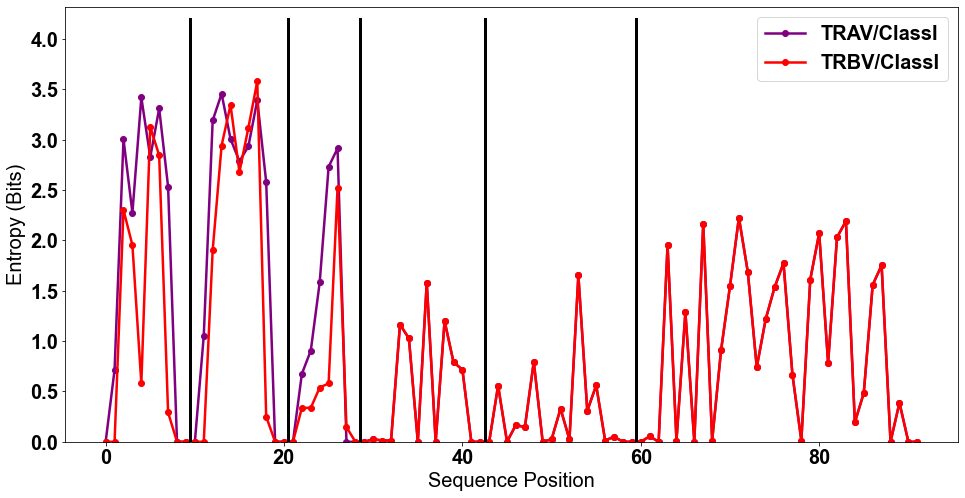

In [10]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
####### redefine these for whatever your variables are ######
plot_avg1 = cI_trav_ent; plot_avg2 = cI_trbv_ent
# standard deviation is undefined for non-bootstrap data
plot_std1 = []; plot_std2 = []
# Change this to whichever your input data is
full_mat_size = np.vstack((mat_size_tcr,mat_sizeI))
############################################################
if bootstrap:
    # This lets you plot the bootstrap average AND stdev
    pl.plot(plot_avg1,marker='o',linewidth=2.5,color='C0')
    pl.fill_between(np.arange(len(plot_avg1)),plot_avg1+plot_std1,plot_avg1-plot_std1,color='C0',alpha=0.3)
    pl.plot(plot_avg2,marker='o',linewidth=2.5,color='C1')
    pl.fill_between(np.arange(len(plot_avg2)),plot_avg2+plot_std2,plot_avg2-plot_std2,color='C1',alpha=0.3)
else:
    pl.plot(np.arange(len(plot_avg1)),plot_avg1,marker='o',color='purple',linewidth=2.5)
    pl.plot(np.arange(len(plot_avg2)),plot_avg2,marker='o',color='red',linewidth=2.5)
    
# Draw some lines to guide the reader
if type(full_mat_size) != int:
    for i in np.arange(len(full_mat_size)-1):
        ax[0,0].plot((full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100),np.linspace(0,4.2,100),'black',linewidth = 3)
    
pl.legend(['TRAV/ClassI','TRBV/ClassI'])
pl.ylim([0,4.32])
pl.xlabel('Sequence Position')
pl.ylabel('Entropy (Bits)')
#pl.savefig('mhc_multiOrg_entropy.pdf',format='pdf')

# Now Do the Same Thing for the Mutual Information

In [11]:
# Different processing for bootstrapped or not
# Can redefine bootstrap as "true" here if you want to load in pre-calculated data
#bootstrap = True
if bootstrap:
    # I'll only include two examples here, but use this code (with names changed) 
    # to process bootstrapped data broadly. Can also just go off of the "final_ent" above
    trav_classI_MI = np.load('classI_trav_bootMI.npy')
    trbv_classI_MI = np.load('classI_trbv_bootMI.npy')
    trav_I_MIavg = np.average(trav_classI_MI,axis=2)
    trbv_I_MIavg = np.average(trbv_classI_MI,axis=2)
else:
    trav_classI_MI = MI_travI
    trbv_classI_MI = MI_trbvI


# First, Just Show the Raw MI for one Example

Text(0.5, 1.0, 'TRAV:MHC MI')

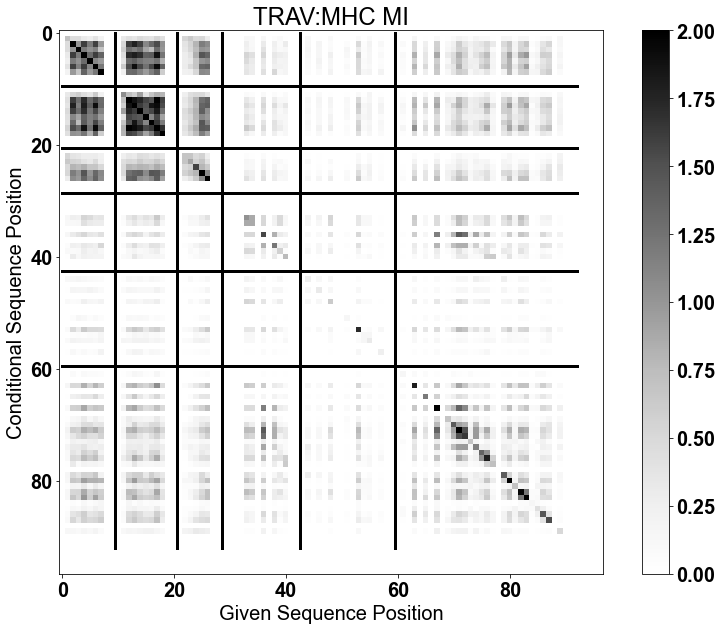

In [12]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(14,10))

x = ax[0,0].imshow(trav_classI_MI,vmin=0,vmax=2,cmap=cm.Greys)
# Again, make something to guide the eyes
poses = sum(full_mat_size)[0]
for i in np.arange(len(full_mat_size)-1):
    ax[0,0].plot( (full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100),np.linspace(0,poses,100),'black',linewidth = 3)
    ax[0,0].plot( np.linspace(0,poses,100), (full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100) ,'black',linewidth = 3)
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI')
#pl.savefig('AIMS_classI_trav_MI.pdf',format='pdf')

# Then, Show the ∆MI Between TRAV and TRBV

Text(0.5, 1.0, 'TRAV:MHC MI - TRBV:MHC MI')

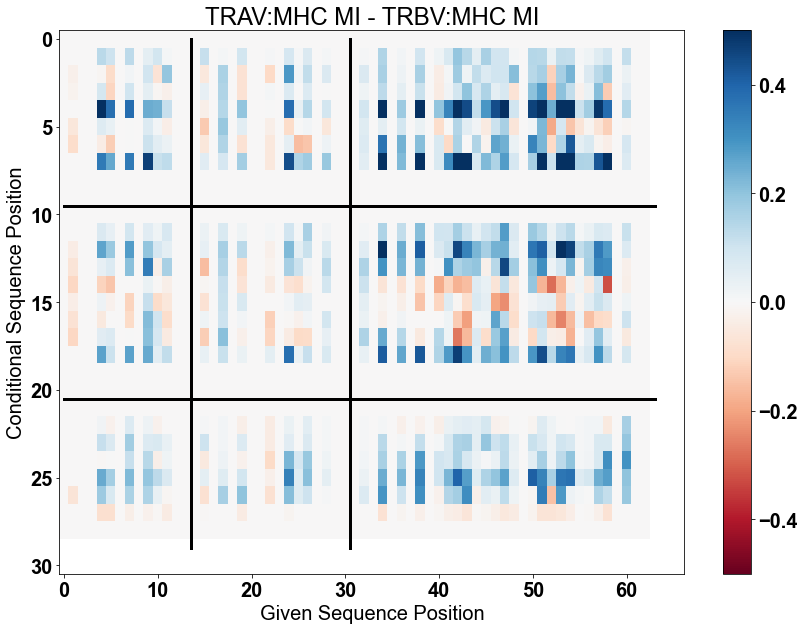

In [13]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(14,10))
# Select out only the cross-entropy with this subset
subset = int(mat_size_tcr[2] + sum(mat_size_tcr[:2]))
# plot it
x = ax[0,0].imshow((trav_classI_MI-trbv_classI_MI)[:subset,subset:],vmin=-0.5,vmax=0.5, interpolation='nearest', aspect='auto',cmap=cm.RdBu)

# Again, draw lines to guide the eyes, separate distinct structural features
poses = sum(full_mat_size[:3])[0]
mat_size_sub = full_mat_size[3:]
for i in np.arange(len(mat_size_sub)-1):
    ax[0,0].plot( (mat_size_sub[i] + sum(mat_size_sub[:i]) - 0.5) * np.ones(100),np.linspace(0,poses,100),'black',linewidth = 3)

# Need to redefine poses and mat_size_sub to only have TCR
poses = sum(full_mat_size[3:])[0]
mat_size_sub = full_mat_size[:3]
for i in np.arange(len(mat_size_sub)-1):
    ax[0,0].plot( np.linspace(0,poses,100), (mat_size_sub[i] + sum(mat_size_sub[:i]) - 0.5) * np.ones(100) ,'black',linewidth = 3)
    
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI - TRBV:MHC MI')
#pl.savefig('AIMS_classI_trav-trbv_MIzoom.pdf',format='pdf')

# Begin Calculation of Interaction Potentials
Note, the generation of these ineraction potentials is VERY slow. You can skip this section if you don't care to recreate interaction potential analysis

# VERY Inefficient, But in Our Calculation of Interaction Potential We Calculate EVERY Possible Interaction
So, you need to generate a new, "concatenated dataframe" of the combinatorics here

In [14]:
# Need to do some combinatorics fun to generate a complete dataset:
first = True
a = 0
tcr_dframe = pandas.concat([fin_trav,fin_trbv],axis=0)
tcr_dframe.index = ['CDR1A','CDR2A','CDR3A','CDR1B','CDR2B','CDR3B']

mhc_df = classI # (or classIIa_df, or classIIb_df)

for i in np.transpose(mhc_df[1]):
    if i == '':
        print(a)
        continue
    repeat_mhc = np.transpose(pandas.DataFrame([i]*np.shape(tcr_dframe)[1]))
    repeat_mhc.columns = tcr_dframe.columns
    if first:
        concat_dframe = pandas.concat([tcr_dframe,repeat_mhc],axis=0)
        first = False
    else:
        concat_dframe = pandas.concat([concat_dframe,pandas.concat([tcr_dframe,repeat_mhc],axis=0)],axis=1)
    a = a +1
seqF_cols, seqF_0 = aims.labelIT(np.shape(concat_dframe)[1],'mhc_tcr_pair')
concat_dframe.columns = seqF_cols

# NOTE: Really not recommended to run this next cell. Calculation takes VERY long
Talking 0.5-1 hour per loop, and you need to do all 4 loops. Only run this cell if you are very interested in the results.

Really need to make this code more efficient at some point... could likely speed this up a LOT but not calculating the interaction potential of the FULL MHC sequence, but for now that is what I do for consistency with the manuscript

Instead of running this code, you can now download the output data! Check out the Zenodo repository DOI:10.5281/zenodo.7023681 (link: https://doi.org/10.5281/zenodo.7023680 )

In [15]:
# Run through these calculations for every loop (and then later for every MHC chain)
#for loop in ['CDR1B','CDR2B']: #,'CDR1B','CDR2B']:
    # Have to sort of double transpose these.
    # First one is to select the data subset, second one to input into software
    # Note, TRAV is shorter than TRBV so sometimes need to dropna columns
#    dChoice = np.transpose(concat_dframe)[[loop,0]].dropna()
    # Scormat can either be v1 or v2. v2 Used for the manuscript
#    scores, score_avg, score_std = aims.get_interaction_score(np.transpose(dChoice),MSA=False,scorMat='v2')
    # Save the results since this takes SO LONG
#    np.save(loop+'_classI_score',scores); np.save(loop+'_classI_average',score_avg); np.save(loop+'_classI_std',score_std)

# Hopefully you can now load back in the files and do the rest of the analysis
Note, obviously the path listed here assumes you download the data from Zenodo (link posted above) and put that new data into the main AIMS directory

In [15]:
mhc_class = 1
if mhc_class == 1:
    a1_scores = np.load('AIMS_interact_scores/cdr1a_classI_FullScores.npy')
    a2_scores = np.load('AIMS_interact_scores/cdr2a_classI_FullScores.npy')
    b1_scores = np.load('AIMS_interact_scores/cdr1b_classI_FullScores.npy')
    b2_scores = np.load('AIMS_interact_scores/cdr2b_classI_FullScores.npy')
elif mhc_class == 2:
    a1_IIa_scores = np.load('AIMS_interact_scores/cdr1a_classIIa_score.npy')
    a1_IIb_scores = np.load('AIMS_interact_scores/cdr1a_classIIb_score.npy')
    a2_IIa_scores = np.load('AIMS_interact_scores/cdr2a_classIIa_score.npy')
    a2_IIb_scores = np.load('AIMS_interact_scores/cdr2a_classIIb_score.npy')
    b1_IIa_scores = np.load('AIMS_interact_scores/cdr1b_classIIa_score.npy')
    b1_IIb_scores = np.load('AIMS_interact_scores/cdr1b_classIIb_score.npy')
    b2_IIa_scores = np.load('AIMS_interact_scores/cdr2b_classIIa_score.npy')
    b2_IIb_scores = np.load('AIMS_interact_scores/cdr2b_classIIb_score.npy')

# So this is what we do for our by-allele breakdown of the interactions scores

# We Need to Pull Back in Our MHC Allele Names and Our TCR Allele Names

In [16]:
# HLA NAMES CLASS I
hla_names_I = pandas.read_csv('germline_data/HLAnames2.csv').values[0:]
# HLA NAMES CLASS IIa
hla_names_IIa = pandas.read_csv('germline_data/classIIa_names.csv').values[0:]
# HLA NAMES CLASS IIb
hla_names_IIb = pandas.read_csv('germline_data/classIIb_names.csv').values[0:]

# Now load in the individual TCR alleles
trav_name = pandas.read_csv('germline_data/travnames.csv').values[0:]
trbv_name = pandas.read_csv('germline_data/trbvnames.csv').values[0:]


# Pretty much every step from here on out is pretty slow... As a heads up

Text(0.5, 1.0, 'CDR2A Interaction Breakdown')

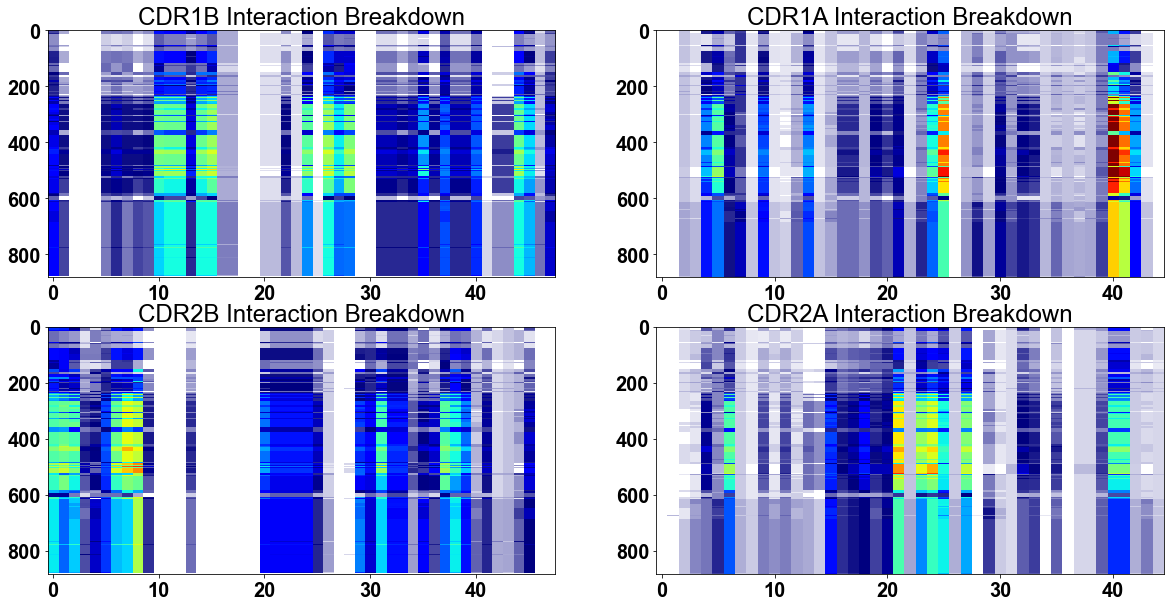

In [17]:
if mhc_class == 1:
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
elif mhc_class == 2:
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)

    
fig, ax = pl.subplots(2, 2,squeeze=False,figsize=(20,10))
x = ax[0,0].imshow(np.transpose(b1_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[1,0].imshow(np.transpose(b2_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[0,1].imshow(np.transpose(a1_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[1,1].imshow(np.transpose(a2_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)

ax[0,0].set_title('CDR1B Interaction Breakdown'); ax[1,0].set_title('CDR2B Interaction Breakdown')
ax[0,1].set_title('CDR1A Interaction Breakdown'); ax[1,1].set_title('CDR2A Interaction Breakdown')

Text(0, 0.5, 'Average Interaction Potential')

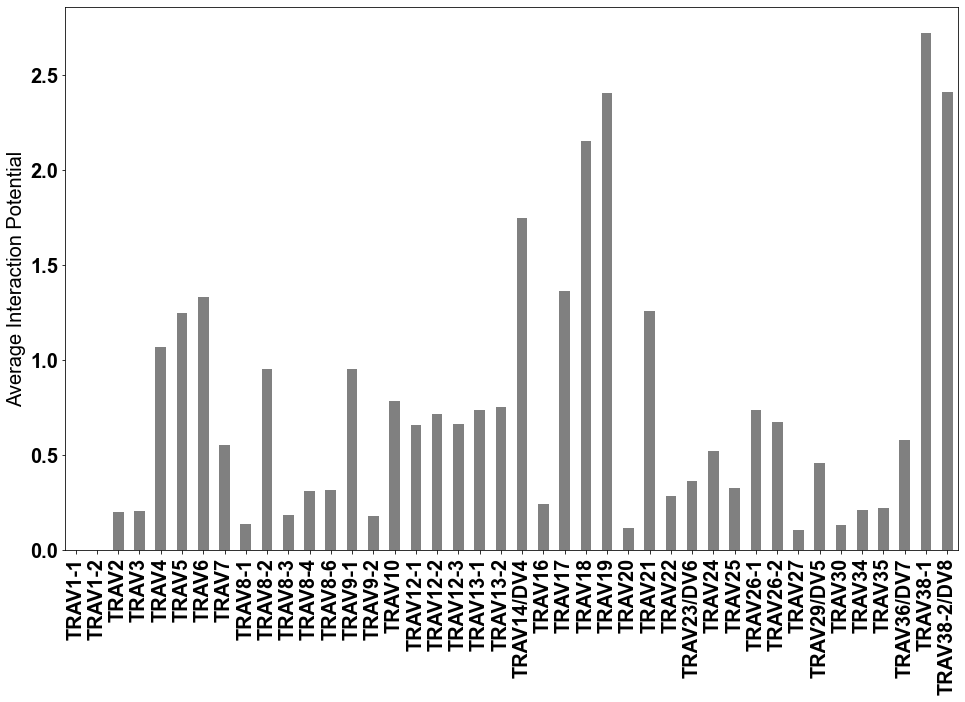

In [18]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,10))
trbv_plot_df = np.transpose(pandas.concat([a1_breakdown,a2_breakdown],axis=1)).mean().iloc[:-3]
trbv_plot_df.plot.bar(color='grey')
pl.ylabel('Average Interaction Potential')

Text(0, 0.5, 'Average Interaction Potential')

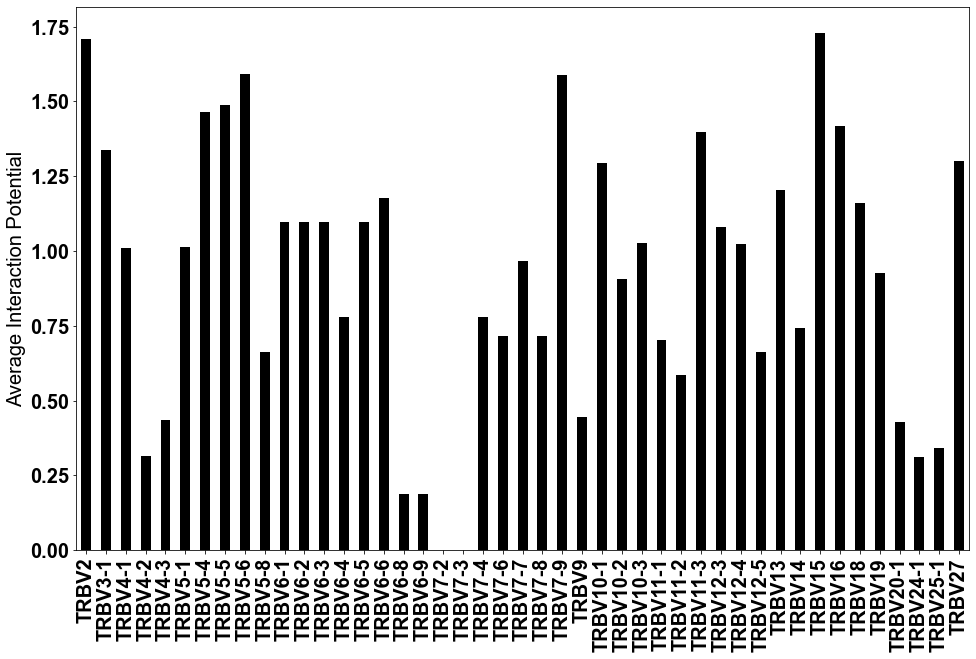

In [19]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,10))
trbv_plot_df = np.transpose(pandas.concat([b1_breakdown,b2_breakdown],axis=1)).mean().iloc[:-3]
trbv_plot_df.plot.bar(color='black')
pl.ylabel('Average Interaction Potential')

In [20]:
#### Define if you want to calculate the clash score or the standard score here #######
clash=False
if mhc_class == 1:
    #######################################################################
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    # now reversed
    b1_reverse,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_reverse,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_reverse,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    a2_reverse,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    
elif mhc_class == 2:
    # Note, can keep "Score" True for both chains because we only input one of the chains, other left blank
    #######################################################################
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    # now reversed
    b1_reverse,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_reverse,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_reverse,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIa_scores,trav_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_reverse,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIa_scores,trav_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)

In [21]:
# Class II strings in the comment next to the definition
if mhc_class == 1:
    sub_class_1 = 'A'
    sub_class_2 = 'B'
    sub_class_3 = 'C'
elif mhc_class == 2:
    sub_class_1 = 'DQ'
    sub_class_2 = 'DR'
    sub_class_3 = 'DP'

b1_a = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_1)].values);b1_b = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_2)].values);b1_c = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_3)].values)
b1_aR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_1)].values);b1_bR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_2)].values);b1_cR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_3)].values);

b2_a = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_1)].values);b2_b = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_2)].values);b2_c = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_3)].values)
b2_aR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_1)].values);b2_bR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_2)].values);b2_cR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_3)].values);

a1_a = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_1)].values);a1_b = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_2)].values);a1_c = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_3)].values)
a1_aR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_1)].values);a1_bR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_2)].values);a1_cR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_3)].values);

a2_a = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_1)].values);a2_b = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_2)].values);a2_c = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_3)].values)
a2_aR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_1)].values);a2_bR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_2)].values);a2_cR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_3)].values);

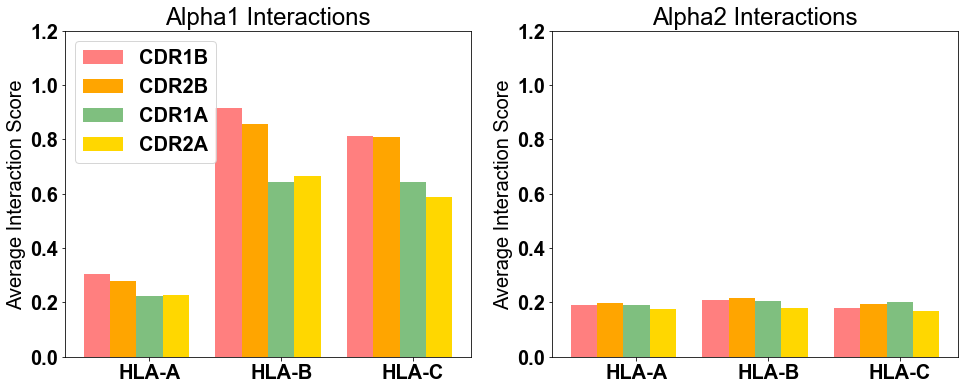

In [22]:
fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(16,6))
# alpha1
ax[0,0].bar([-0.4,0.6,1.6],[b1_a,b1_b,b1_c],width=0.2,color='red',alpha=0.5); ax[0,0].bar([-0.2,0.8,1.8],[b2_a,b2_b,b2_c],width=0.2,color='orange')
ax[0,0].bar([0,1,2],[a1_aR,a1_bR,a1_cR],width=0.2,color='green',alpha=0.5); ax[0,0].bar([0.2,1.2,2.2],[a2_aR,a2_bR,a2_cR],width=0.2,color='gold')
xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-A','HLA-B','HLA-C'])
#xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-DQ','HLA-DR','HLA-DP'])
ax[0,0].set_title('Alpha1 Interactions')
ax[0,0].set_ylabel('Average Interaction Score')
# alpha2
ax[0,1].bar([-0.4,0.6,1.6],[b1_aR,b1_bR,b1_cR],width=0.2,color='red',alpha=0.5); ax[0,1].bar([-0.2,0.8,1.8],[b2_aR,b2_bR,b2_cR],width=0.2,color='orange')
ax[0,1].bar([0,1,2],[a1_a,a1_b,a1_c],width=0.2,color='green',alpha=0.5); ax[0,1].bar([0.2,1.2,2.2],[a2_a,a2_b,a2_c],width=0.2,color='gold')
xax=pl.setp(ax[0,1],xticks=np.arange(3),xticklabels=['HLA-A','HLA-B','HLA-C'])
#xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-DQ','HLA-DR','HLA-DP'])
ax[0,1].set_title('Alpha2 Interactions')
ax[0,0].legend(['CDR1B','CDR2B','CDR1A','CDR2A'])
ax[0,1].set_ylabel('Average Interaction Score')

if clash:
    ax[0,0].set_ylim([-0.3,0])
    ax[0,1].set_ylim([-0.3,0])
else:
    ax[0,0].set_ylim([0,1.2])
    ax[0,1].set_ylim([0,1.2])

#pl.savefig('tcrBar_classI_HLAbreakdown_BADclash.pdf',format='pdf')

# So in the Manuscript Currently, I have a Bar Graph, But I Might be Starting to think a Violin Plot is More Appropriate?

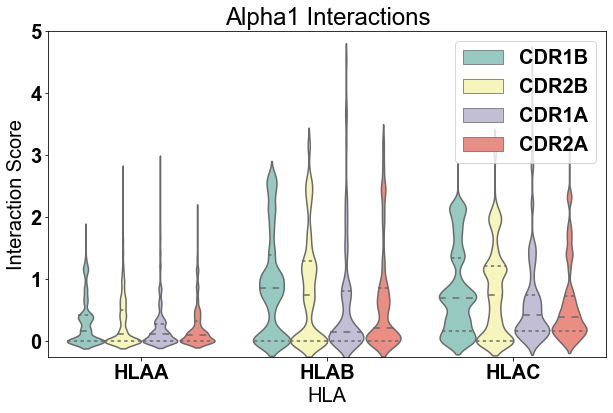

In [32]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(10,6))
names = ['CDR1B','CDR2B','CDR1A','CDR2A']
violin_df = []
for temp_class in [sub_class_1,sub_class_2,sub_class_3]:
    name_hold = 0
    for temp_var in [b1_breakdown,b2_breakdown,a1_reverse,a2_reverse]:
        temp_name = names[name_hold]
        temp_data = np.transpose(temp_var)[temp_var.columns.str.contains(temp_class)].values
        temp_shape = np.shape(temp_data)
        temp_reshape = pandas.DataFrame(temp_data.reshape(temp_shape[0]*temp_shape[1]))
        temp_name = pandas.DataFrame(len(temp_reshape)*[temp_name])
        temp_hla = pandas.DataFrame(len(temp_reshape)*['HLA'+temp_class])
        temp_df = pandas.concat([temp_reshape,temp_name,temp_hla],axis=1); temp_df.columns =['Interaction Score','Name','HLA']
        if len(violin_df) == 0:
            violin_df = temp_df
        else:
            violin_df = pandas.concat([violin_df,temp_df],axis=0)
        name_hold += 1
x=sns.violinplot(x='HLA',y='Interaction Score',data=violin_df,inner="quartile",palette='Set3',hue='Name',scale='count')
x.legend_.set_title(None)
pl.title('Alpha1 Interactions')

if clash:
    pl.ylim([-3,0.1])
else:
    pl.ylim([-0.25,5])
#sns.violinplot(x='HLA',y='Data',data=violin_df,palette='Set2',hue='Name')
#pl.savefig('alpha1_violin_clash.pdf',format='pdf')

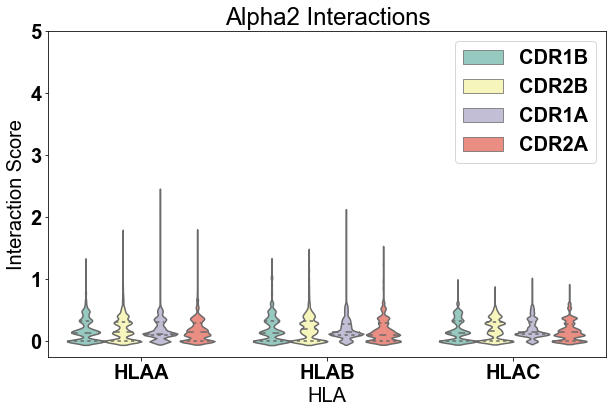

In [33]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(10,6))
names = ['CDR1B','CDR2B','CDR1A','CDR2A']
violin_df = []
for temp_class in [sub_class_1,sub_class_2,sub_class_3]:
    name_hold = 0
    for temp_var in [b1_reverse,b2_reverse,a1_breakdown,a2_breakdown]:
        temp_name = names[name_hold]
        temp_data = np.transpose(temp_var)[temp_var.columns.str.contains(temp_class)].values
        temp_shape = np.shape(temp_data)
        temp_reshape = pandas.DataFrame(temp_data.reshape(temp_shape[0]*temp_shape[1]))
        temp_name = pandas.DataFrame(len(temp_reshape)*[temp_name])
        temp_hla = pandas.DataFrame(len(temp_reshape)*['HLA'+temp_class])
        temp_df = pandas.concat([temp_reshape,temp_name,temp_hla],axis=1); temp_df.columns =['Interaction Score','Name','HLA']
        if len(violin_df) == 0:
            violin_df = temp_df
        else:
            violin_df = pandas.concat([violin_df,temp_df],axis=0)
        name_hold += 1
x=sns.violinplot(x='HLA',y='Interaction Score',data=violin_df,inner="quartile",palette='Set3',hue='Name',scale='count')
x.legend_.set_title(None)
pl.title('Alpha2 Interactions')

if clash:
    pl.ylim([-3,0.1])
else:
    pl.ylim([-0.25,5])
#sns.violinplot(x='HLA',y='Data',data=violin_df,palette='Set2',hue='Name')
#pl.savefig('alpha2_violin_clash.pdf',format='pdf')

# This is what we do for our by-residue interaction score processing

# Even Processing these Scores Takes a Bit of Time
Probably 5 or so minutes

In [25]:
if mhc_class == 1:
    cdra1_classI = aims.get_byRes_scores(a1_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdra2_classI = aims.get_byRes_scores(a2_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdrb1_classI = aims.get_byRes_scores(b1_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdrb2_classI = aims.get_byRes_scores(b2_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
elif mhc_class == 2:
    # b1, need to concatenate these a little differently
    cdrb1_alpha = aims.get_byRes_scores(b1_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdrb1_beta = aims.get_byRes_scores(b1_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdrb1_classII = np.hstack((cdrb1_alpha,cdrb1_beta))
    # b2
    cdrb2_alpha = aims.get_byRes_scores(b2_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdrb2_beta = aims.get_byRes_scores(b2_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdrb2_classII = np.hstack((cdrb2_alpha,cdrb2_beta))
    # a1
    cdra1_alpha = aims.get_byRes_scores(a1_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdra1_beta = aims.get_byRes_scores(a1_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdra1_classII = np.hstack((cdra1_alpha,cdra1_beta))
    # a2
    cdra2_alpha = aims.get_byRes_scores(a2_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdra2_beta = aims.get_byRes_scores(a2_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdra2_classII = np.hstack((cdra2_alpha,cdra2_beta))

# Define the selected MHC residues so we can plot them on plots down the line

In [26]:
alpha1 = [55,56,59,60,63,66,67,70,74,77,80]
alpha2 = [143,144,147,148,149,152,153,156,160,161,164,165,167,168]
II_alpha_contacts = [51, 53, 55, 56, 58, 59, 62, 63, 66, 69, 70, 73, 74]
II_beta_contacts = [63, 66, 67, 70, 71, 73, 74, 76, 77, 80, 83, 84, 87, 88, 91, 92]

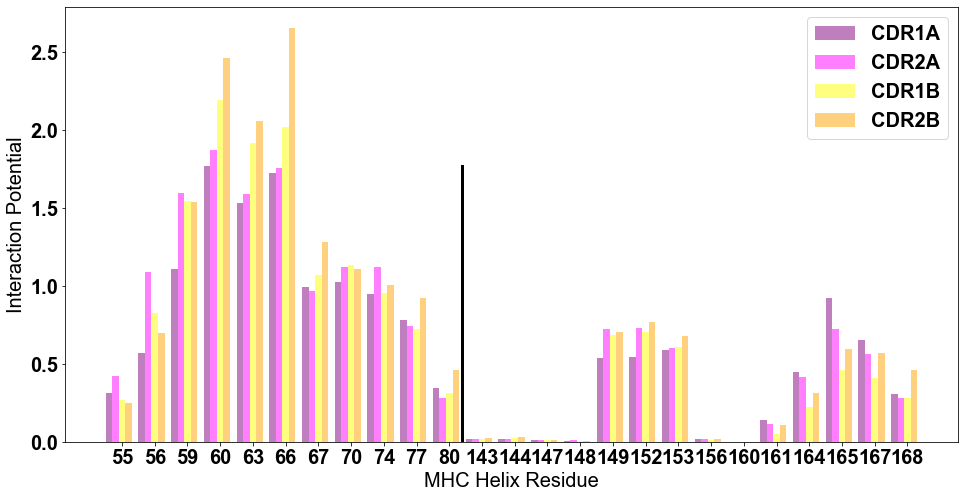

In [27]:
################################################################
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))

if mhc_class == 1:
    pl.bar(np.arange(len(cdra1_classI))-0.4,cdra1_classI,alpha=0.5,width=0.2,color='purple')
    pl.bar(np.arange(len(cdra2_classI))-0.2,cdra2_classI,alpha=0.5,width=0.2,color='magenta')
    pl.bar(np.arange(len(cdrb1_classI)),cdrb1_classI,alpha=0.5,width=0.2,color='yellow')
    pl.bar(np.arange(len(cdrb2_classI))+0.2,cdrb2_classI,alpha=0.5,width=0.2,color='orange')
    alpha_list = alpha1 + alpha2
    ax[0,0].legend(['CDR1A','CDR2A','CDR1B','CDR2B'])
    pl.plot(len(alpha1) * np.ones(100)-0.6, np.linspace(0,np.max(cdra1_classI),100),'black',linewidth = 3)
elif mhc_class == 2:
    pl.bar(np.arange(len(cdra1_classII))-0.4,cdra1_classII,alpha=0.5,width=0.2,color='purple')
    pl.bar(np.arange(len(cdra2_classII))-0.2,cdra2_classII,alpha=0.5,width=0.2,color='magenta')
    pl.bar(np.arange(len(cdrb1_classII)),cdrb1_classII,alpha=1.0,width=0.2,color='yellow')
    pl.bar(np.arange(len(cdrb2_classII))+0.2,cdrb2_classII,alpha=0.5,width=0.2,color='orange')
    alpha_list = II_alpha_contacts + II_beta_contacts
    ax[0,0].legend(['CDR1A','CDR2A','CDR1B','CDR2B'])
    pl.plot(len(II_alpha_contacts) * np.ones(100)-0.6, np.linspace(0,np.max(cdrb2_classII),100),'black',linewidth = 3)

pl.xlabel('MHC Helix Residue')
pl.ylabel('Interaction Potential')
label= alpha_list
xaxis = np.arange(len(alpha_list))
xax=pl.setp(ax[0,0],xticks=xaxis,xticklabels=label)

#pl.savefig('classII_potentialANDcryst_redo.pdf',format='pdf')

# Lastly,Do Good-Old Classic AIMS Biophysical Analysis
In the manuscript, we only do this for the MHC molecules, so do the same here

In [28]:
# Reminder of what we defined our dataframes as:
classI_seqs = classI[1]
classIIa_seqs = classIIa_df[0]
classIIb_seqs = classIIb_df[0]
trav_seqs = fin_trav
trbv_seqs = fin_trbv

# Then, We Need to Pull Out Certain Subsets of the Data

In [29]:
# Get the relevant subset of class I
subI = plot_seq_classI

# Need to get relevent subsets of class II
subIIa = plot_seq_classIIa
subIIb = plot_seq_classIIb
# Run these if you want these sequences as a dataframe
subI_df = pandas.DataFrame(subI); subI_df.index = classI[0]
subIIa_df = pandas.DataFrame(subIIa); subIIa_df.index = classIIa_df['Allele']
subIIb_df = pandas.DataFrame(subIIb); subIIb_df.index = classIIb_df['Allele']

In [30]:
# Process this new matrix and apply biophysical propery "masks"
parallel_process = False
if mhc_class == 1:
    dsetF = subI_df[[0,1]].values
    num_iter = 1
elif mhc_class == 2:
    dsetF = subIIa_df
    num_iter = 2

# Need to get a little bit creative here to account for the fact that for Class II
# molecules, there is a data size mismatch... bit of a pain but we can get over it
for rep in np.arange(num_iter):
    if mhc_class == 1:
        dsetF = subI_df[[0,1]].values
    elif mhc_class == 2:
        if rep == 0:
            dsetF = subIIa_df[0].values.reshape(len(subIIa_df),1)
        elif rep == 1:
            dsetF = subIIb_df[0].values.reshape(len(subIIb_df),1)
    mat_size = aims.get_sequence_dimension(np.transpose(dsetF))[0]
    if rep == 0:
        mat_sizeF = mat_size
    if rep == 1:
        mat_sizeF = np.vstack((mat_sizeF,mat_size))
    seq_MIf = aims.gen_MSA_matrix(np.transpose(dsetF) ,key = AA_num_key_dash, giveSize = mat_size)

    #################### PARALLEL PROCESSING TO CREATE BIG MATRIX #######################
    if parallel_process:
        import multiprocessing as mp
        def boot_it(data):
            bigass = classy.get_bigass_matrix(dsetF[:,data[0]:data[1]], giveSize = mat_size, alignment = align, norm=True)
            return(bigass)
        def do_boot(data):
            with mp.Pool() as pool:
                results = pool.map(boot_it, data)
                return(results)
        if __name__ == "__main__":
            # Probably a smarter way to calculate #seqs per node, but do 100 for now
            final = aims.gen_splits(splitMat = seq_MIf, splitSize = 100)
            big_pre = do_boot(final)
        total_mat = np.concatenate(big_pre, axis = 0)
    else:
        bigass = classy.get_bigass_matrix(np.transpose(dsetF), giveSize = mat_size, alignment = 'center', norm = True )
        total_mat = bigass

    ### So in normal script, we have further processing for this BIG matrix... For this, lets just take out correlated data
    prop_list_old = ['Phobic1','Charge','Phobic2','Bulk','Flex','Kid1','Kid2','Kid3','Kid4','Kid5','Kid6','Kid7','Kid8','Kid9','Kid10']
    prop_list_new = ['Hot'+str(b+1) for b in range(46)]

    prop_names = prop_list_old + prop_list_new
    num_locs = int(np.shape(total_mat)[1]/61)
    Bigass_names = []
    for i in prop_names:
        for j in np.arange(num_locs):
            Bigass_names = Bigass_names + [ i + '-' + str(j) ]

    # AND THEN GO ON WITH THE REST OF THE dropping of correlated vectors
    full_big = pandas.DataFrame(total_mat,columns = Bigass_names)
    drop_zeros = [column for column in full_big.columns if all(full_big[column] == 0 )]
    y = full_big.drop(full_big[drop_zeros], axis=1)
    z_pre = np.abs(np.corrcoef(np.transpose(y)))
    z = pandas.DataFrame(z_pre,columns=y.columns,index=y.columns)
    # Select upper triangle of correlation matrix
    upper = z.where(np.triu(np.ones(z.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if ( any(upper[column] > 0.75) ) ]

    parsed_mat = y.drop(y[to_drop], axis=1)

    # Process things a little artifically just to match with previously written code
    ID_df = pandas.DataFrame(np.ones(len(full_big))); ID_df.columns = ['ID']
    dframe_IDed = pandas.concat([full_big,ID_df],axis=1)
    seq_bigF = aims.split_reshape(dframe_IDed, matShape = np.shape(seq_MIf)[1], total_props = 61)[0]
    if rep == 0:
        seq_bigF1 = seq_bigF
    elif rep == 1:
        seq_bigF2 = seq_bigF

/opt/anaconda3/envs/immunopep/lib/python3.7/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/immunopep/lib/python3.7/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 0, 'Sequence Position')

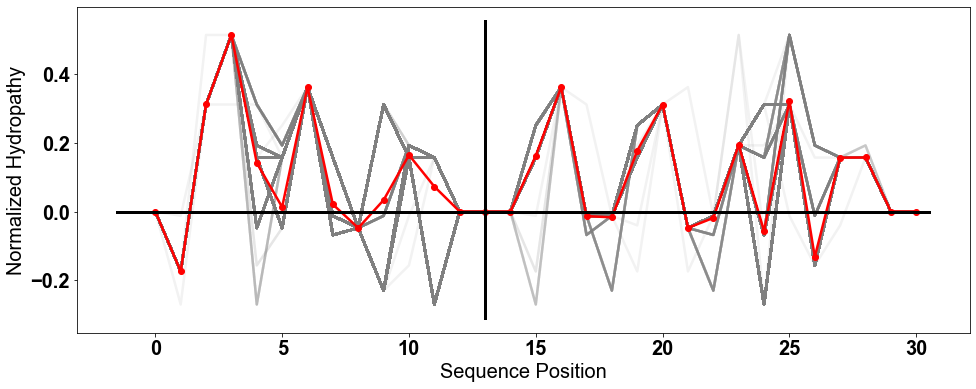

In [31]:
# Now get the position sensitive avarege biophysical properties
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,6))
prop1 = 2

if mhc_class == 1:
    plotProp = np.average(seq_bigF1[:,prop1,:],axis = 0)
    for i in np.arange(len(seq_bigF1[:,prop1,:])):
        ax[0,0].plot(seq_bigF1[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)
elif mhc_class == 2:
    plot_pre1 = np.average(seq_bigF1[:,prop1,:],axis = 0)
    plot_pre2 = np.average(seq_bigF2[:,prop1,:],axis = 0)
    plotProp = np.hstack((plot_pre1,plot_pre2))
    for i in np.arange(len(seq_bigF1[:,prop1,:])):
        ax[0,0].plot(seq_bigF1[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)
    for i in np.arange(len(seq_bigF2[:,prop1,:])):
        ax[0,0].plot(np.arange(len(plot_pre2))+len(plot_pre1),seq_bigF2[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)

ax[0,0].set_ylabel('Charge')
ax[0,0].plot(plotProp,marker='o',linewidth=2.5,color='red')
    

# Draw some nice lines to guide 
y11, y12 = ax[0,0].get_ylim()
if type(mat_sizeF) != int:
    for i in np.arange(len(mat_sizeF)-1):
        ax[0,0].plot( (mat_sizeF[i] + sum(mat_sizeF[:i]) - 1) * np.ones(100),np.linspace(y11,y12,100),'black',linewidth = 3)
get_xlim = ax[0,0].get_xlim()
pl.plot(np.arange(get_xlim[0],get_xlim[1]),np.zeros(len(np.arange(get_xlim[0],get_xlim[1]))),'black',linewidth = 3)

pl.ylabel('Normalized Hydropathy')
pl.xlabel('Sequence Position')
#pl.savefig('GLIPH_posProp.pdf',format='pdf')